### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [159]:
data = pd.read_csv('data/coupons.csv')

In [160]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [161]:
data.dtypes
data.columns
print('Number of Rows in Data Frame = ', len(data))
print ('% of each column that has a null value ',data.isna().sum()/len(data)*100)

Number of Rows in Data Frame =  12684
% of each column that has a null value  destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


In [162]:
#pd.to_numeric(data["age"])
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [163]:
# Looking at the data above the car data is pretty much useless as it has almost 99.14% null values
# The passanger mis-spelling is bothering me so I cam going to rename it
data = data.rename(columns={"passanger":"passenger"})
data.columns


Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

4. What proportion of the total observations chose to accept the coupon?



In [164]:
acceptance_rate = 1-len((data[data["Y"] ==0]))/len(data)
print (f"The acceptance_rate is {acceptance_rate:.2%}")

The acceptance_rate is 56.84%


5. Use a bar plot to visualize the `coupon` column.

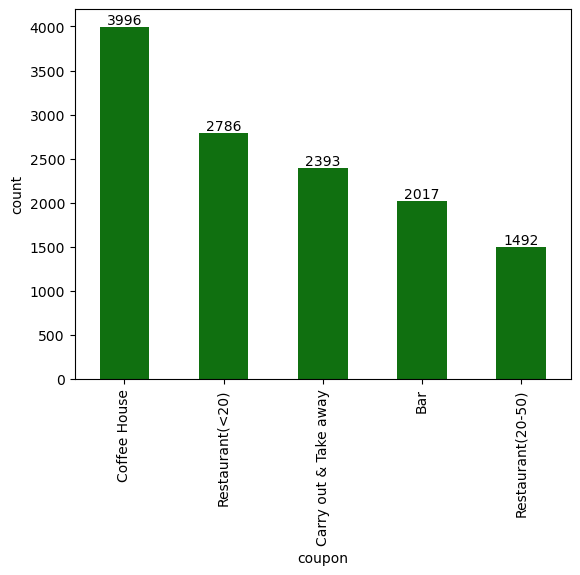

In [165]:
coupons=[]
coupons = data["coupon"].value_counts()
coupons_df = coupons.reset_index()
coupons_df.columns = ['coupon', 'count'] 
#print(coupons)
#coupons_df.columns
plt.xticks(rotation=90)
cp_plot = sns.barplot(coupons_df,x='coupon',y='count',color='green',legend="brief",width = .5)
#Add labels to bars to make them readable
for container in cp_plot.containers:
    cp_plot.bar_label(container)


6. Use a histogram to visualize the temperature column.

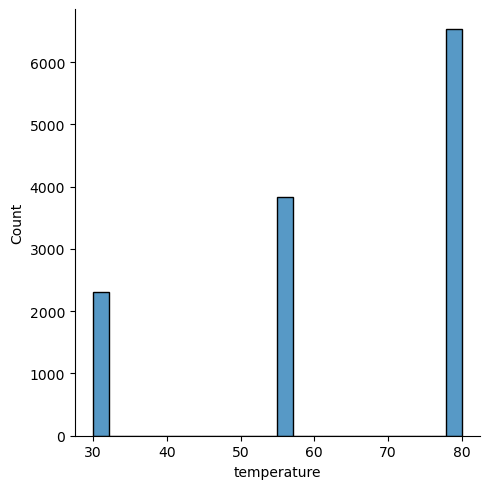

In [166]:
#sns.displot(temp_df['time']) 
sns.displot(data,x='temperature')


In [167]:
## This is not a good use of the histogram as the cardinality of the temperature column is 3

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [168]:
bar_coupons_df = data[data["coupon"].str.contains("Bar")]
#bar_coupons_df["Bar"].value_counts()
#bar_coupons_df.columns
#bar_coupons_df["income"].value_counts()

2. What proportion of bar coupons were accepted?


In [169]:
# Define a function that calculates the acceptance ratio
def bar_acceptance_ratio(bar_coupons_df):
    b_a_r = 0
    b_a_r = 1-len((bar_coupons_df[bar_coupons_df['Y'] ==0]))/len(bar_coupons_df)
    return b_a_r
print (f"The overall acceptance rate is {bar_acceptance_ratio(bar_coupons_df):.2%}")

The overall acceptance rate is 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [170]:
# Let's create a list of the various times someone went to the bar
list_of_bar_times = ["never","less1","1~3"]

#creating two temporary data frames one for people < 3 times and one for people greater than 3 times
bar_coupons_df_le_3 = bar_coupons_df[bar_coupons_df["Bar"].isin(list_of_bar_times)]
print (f"The acceptance rate for people who went to a bar 3 or fewer times is {bar_acceptance_ratio(bar_coupons_df_lt_3):.2%}")
bar_coupons_df_gt_3 = bar_coupons_df[~bar_coupons_df["Bar"].isin(list_of_bar_times)]
print (f"The acceptance rate for people who went to a bar greater than 3 times is {bar_acceptance_ratio(bar_coupons_df_gt_3):.2%}")


The acceptance rate for people who went to a bar 3 or fewer times is 37.06%
The acceptance rate for people who went to a bar greater than 3 times is 73.18%


In [171]:
# This makes sense as the more they go to a bar the more likely they are to accept a coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [172]:
#Similar to above but with a different list for people who go to bar more than once and over the age of 25
list_of_bar_times = ["never","less1"]
list_of_ages = ["below21","21"]
bar_coupons_df_ge_1_age_gt_25 = bar_coupons_df[(~bar_coupons_df["Bar"].isin(list_of_bar_times)) 
                                     & (~bar_coupons_df["age"].isin(list_of_ages))]
print (f"The acceptance rate for people who went to a bar at more than once a month aged > 25 {bar_acceptance_ratio(bar_coupons_df_ge_1_age_gt_25):.2%}")


The acceptance rate for people who went to a bar at more than once a month aged > 25 68.18%


In [173]:
#This is in line with the overall rate as the minimum drinking age is 25

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [174]:
df_subset = []
list_of_bar_times = ["never","less1"]
list_of_occupations = ["farming","fishing","forestry"]
list_of_passengers = ["Kid(s)"]
df_subset = bar_coupons_df[(~bar_coupons_df["Bar"].isin(list_of_bar_times)) 
                                   & (~bar_coupons_df["occupation"].isin(list_of_occupations))
                                   & (~bar_coupons_df["passenger"].isin(list_of_passengers))]
print (f"The acceptance rate for this category is {bar_acceptance_ratio(df_subset):.2%}")

The acceptance rate for this category is 70.30%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.


In [175]:
# Category - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
list_of_marital_status = ["Widowed"]
df_subset = bar_coupons_df[(~bar_coupons_df["Bar"].isin(list_of_bar_times)) 
                                   & (~bar_coupons_df["maritalStatus"].isin(list_of_marital_status))
                                   & (~bar_coupons_df["passenger"].isin(list_of_passengers))]
print (f"The acceptance rate for this category is {bar_acceptance_ratio(df_subset):.2%}")

The acceptance rate for this category is 70.30%


In [176]:
# go to bars more than once a month and are under the age of 30 *OR*
list_of_ages = ["below21","21","26"]
df_subset = bar_coupons_df[(~bar_coupons_df["Bar"].isin(list_of_bar_times)) 
                                   & (~bar_coupons_df["age"].isin(list_of_ages))]
print (f"The acceptance rate for this category is {bar_acceptance_ratio(df_subset):.2%}")

The acceptance rate for this category is 61.94%


In [177]:
# -go to cheap restaurants more than 4 times a month and income is less than 50K.

list_of_cheap_restaurants = ["1~3","less1","never"]
list_of_incomes = ["$12500 - $24999","$37500 - $49999","Less than $12500"]  

df_subset = bar_coupons_df[(~bar_coupons_df["RestaurantLessThan20"].isin(list_of_cheap_restaurants)) 
                                   & (~bar_coupons_df["income"].isin(list_of_incomes))]
print (f"The acceptance rate for this category is {bar_acceptance_ratio(df_subset):.2%}")

The acceptance rate for this category is 42.57%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [178]:
#Based on the observations the highest probability of people accepting a coupon is people who are going to the bar more than 3 times a month. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

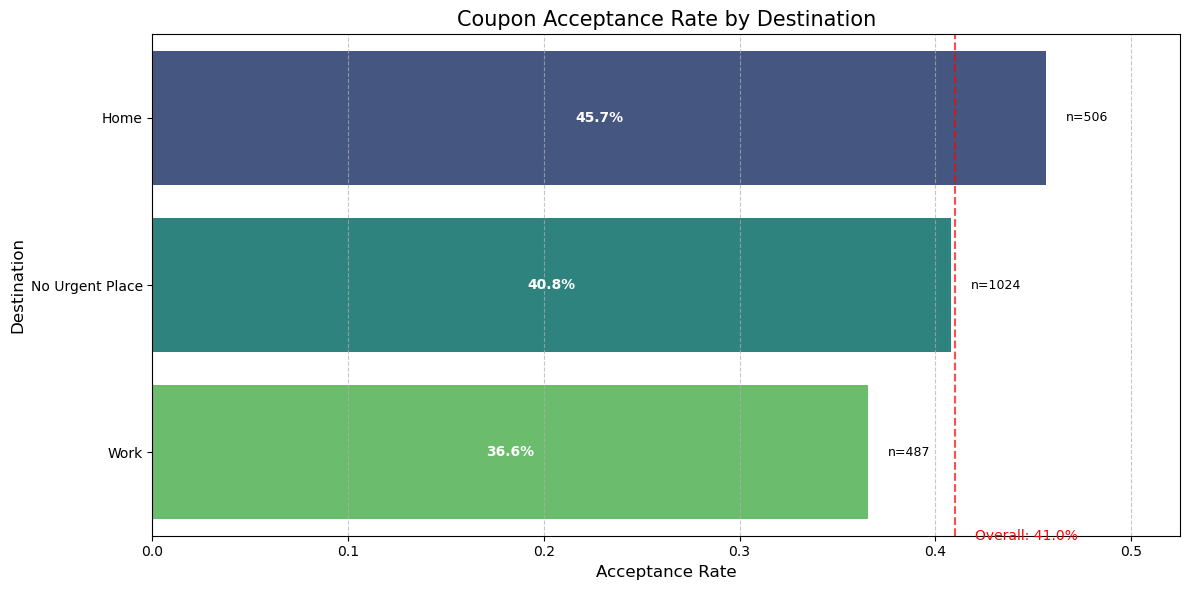

In [179]:

# Rename the "Y" column to "Coupon Accepted"
bar_coupons_df = bar_coupons_df.rename(columns={"Y": "Coupon Accepted"})

# Calculate the acceptance rate and count by destination
destination_stats = bar_coupons_df.groupby('destination').agg(
    acceptance_rate=('Coupon Accepted', 'mean'),
    count=('Coupon Accepted', 'count')
).reset_index()

# Sort by acceptance rate for better visualization
destination_stats = destination_stats.sort_values('acceptance_rate', ascending=False)

# Create a horizontal bar chart with count-based bar width
plt.figure(figsize=(12, 6))

# Create the horizontal bar chart
ax = sns.barplot(y='destination', x='acceptance_rate', data=destination_stats, 
                palette='viridis', orient='h', 
                order=destination_stats['destination'])

# Add percentage labels inside each bar
for i, row in enumerate(destination_stats.itertuples()):
    # Add percentage label
    plt.text(row.acceptance_rate/2, i, f'{row.acceptance_rate:.1%}', 
             ha='center', va='center', color='white', fontweight='bold')
    
    # Add count information at the end of each bar
    plt.text(row.acceptance_rate + 0.01, i, f'n={row.count}', 
             va='center', ha='left', color='black', fontsize=9)

# Add a vertical line for the overall acceptance rate
overall_rate = bar_coupons_df['Coupon Accepted'].mean()
plt.axvline(x=overall_rate, color='red', linestyle='--', alpha=0.7)
plt.text(overall_rate + 0.01, len(destination_stats)-0.5, f'Overall: {overall_rate:.1%}', 
         va='center', color='red')

# Improve the appearance
plt.title('Coupon Acceptance Rate by Destination', fontsize=15)
plt.xlabel('Acceptance Rate', fontsize=12)
plt.ylabel('Destination', fontsize=12)
plt.xlim(0, max(destination_stats['acceptance_rate']) * 1.15)  # Add some space for annotations
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

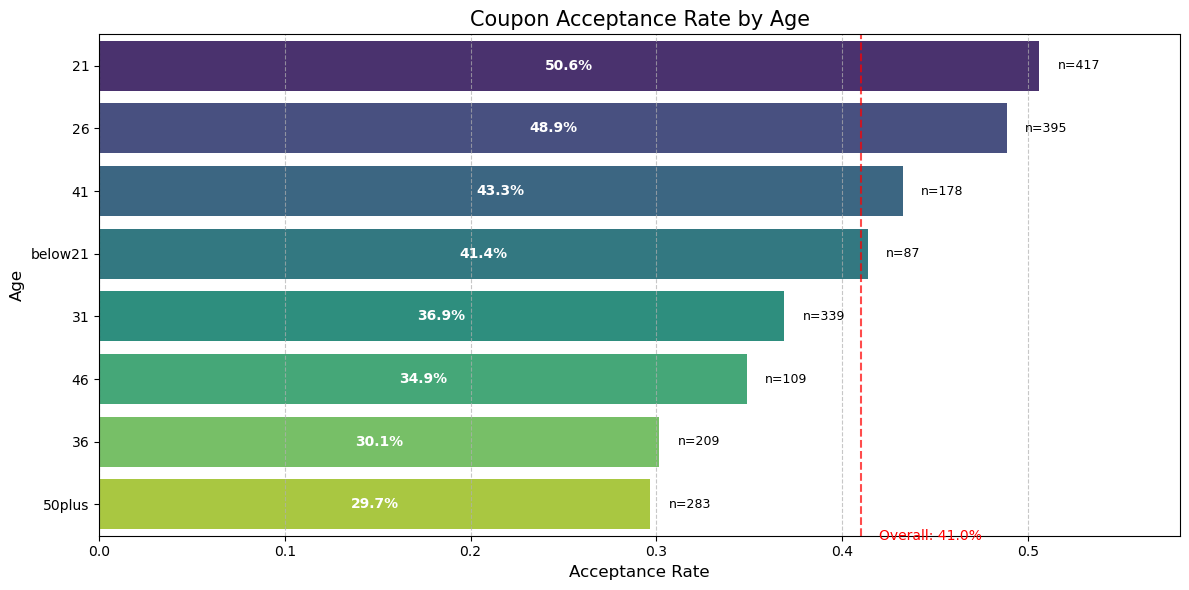

In [180]:
# Calculate the acceptance rate and count by destination
age_stats = bar_coupons_df.groupby('age').agg(
    acceptance_rate=('Coupon Accepted', 'mean'),
    count=('Coupon Accepted', 'count')
).reset_index()

# Sort by acceptance rate for better visualization
age_stats = age_stats.sort_values('acceptance_rate', ascending=False)

# Create a horizontal bar chart with count-based bar width
plt.figure(figsize=(12, 6))

# Create the horizontal bar chart
ax = sns.barplot(y='age', x='acceptance_rate', data=age_stats, 
                palette='viridis', orient='h', 
                order=age_stats['age'])

# Add percentage labels inside each bar
for i, row in enumerate(age_stats.itertuples()):
    # Add percentage label
    plt.text(row.acceptance_rate/2, i, f'{row.acceptance_rate:.1%}', 
             ha='center', va='center', color='white', fontweight='bold')
    
    # Add count information at the end of each bar
    plt.text(row.acceptance_rate + 0.01, i, f'n={row.count}', 
             va='center', ha='left', color='black', fontsize=9)

# Add a vertical line for the overall acceptance rate
overall_rate = bar_coupons_df['Coupon Accepted'].mean()
plt.axvline(x=overall_rate, color='red', linestyle='--', alpha=0.7)
plt.text(overall_rate + 0.01, len(age_stats)-0.5, f'Overall: {overall_rate:.1%}', 
         va='center', color='red')

# Improve the appearance
plt.title('Coupon Acceptance Rate by Age', fontsize=15)
plt.xlabel('Acceptance Rate', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xlim(0, max(age_stats['acceptance_rate']) * 1.15)  # Add some space for annotations
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

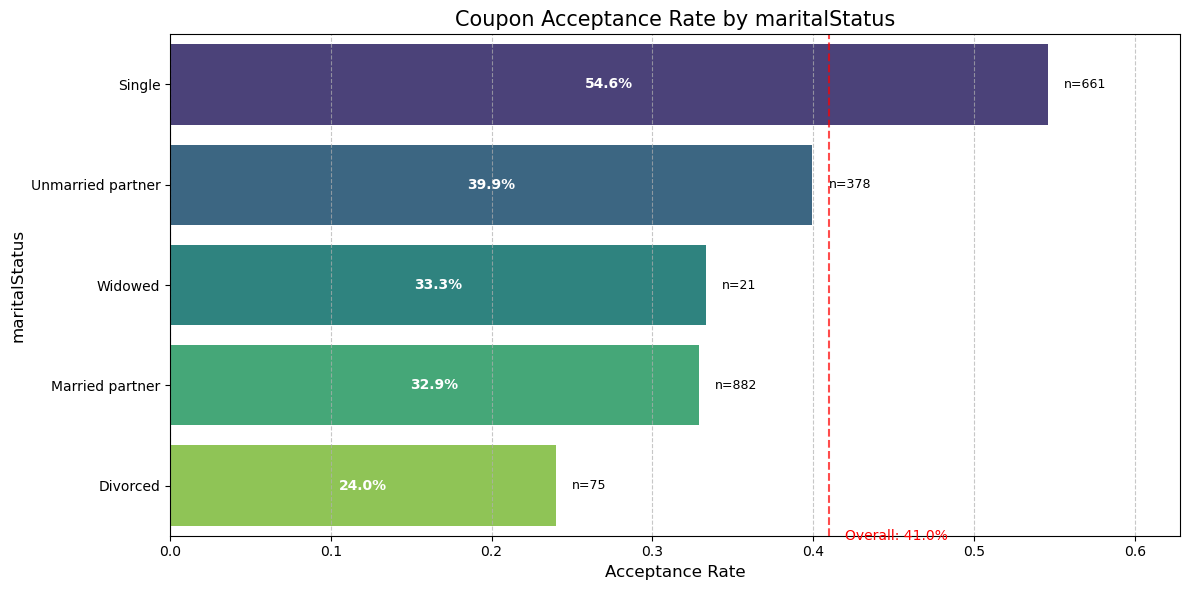

In [181]:
# Compare marital status with acceptance rate
# Calculate the acceptance rate and count by maritalStatus
maritalStatus_stats = bar_coupons_df.groupby('maritalStatus').agg(
    acceptance_rate=('Coupon Accepted', 'mean'),
    count=('Coupon Accepted', 'count')
).reset_index()

# Sort by acceptance rate for better visualization
maritalStatus_stats = maritalStatus_stats.sort_values('acceptance_rate', ascending=False)

# Create a horizontal bar chart with count-based bar width
plt.figure(figsize=(12, 6))

# Create the horizontal bar chart
ax = sns.barplot(y='maritalStatus', x='acceptance_rate', data=maritalStatus_stats, 
                palette='viridis', orient='h', 
                order=maritalStatus_stats['maritalStatus'])

# Add percentage labels inside each bar
for i, row in enumerate(maritalStatus_stats.itertuples()):
    # Add percentage label
    plt.text(row.acceptance_rate/2, i, f'{row.acceptance_rate:.1%}', 
             ha='center', va='center', color='white', fontweight='bold')
    
    # Add count information at the end of each bar
    plt.text(row.acceptance_rate + 0.01, i, f'n={row.count}', 
             va='center', ha='left', color='black', fontsize=9)

# Add a vertical line for the overall acceptance rate
overall_rate = bar_coupons_df['Coupon Accepted'].mean()
plt.axvline(x=overall_rate, color='red', linestyle='--', alpha=0.7)
plt.text(overall_rate + 0.01, len(maritalStatus_stats)-0.5, f'Overall: {overall_rate:.1%}', 
         va='center', color='red')

# Improve the appearance
plt.title('Coupon Acceptance Rate by maritalStatus', fontsize=15)
plt.xlabel('Acceptance Rate', fontsize=12)
plt.ylabel('maritalStatus', fontsize=12)
plt.xlim(0, max(maritalStatus_stats['acceptance_rate']) * 1.15)  # Add some space for annotations
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

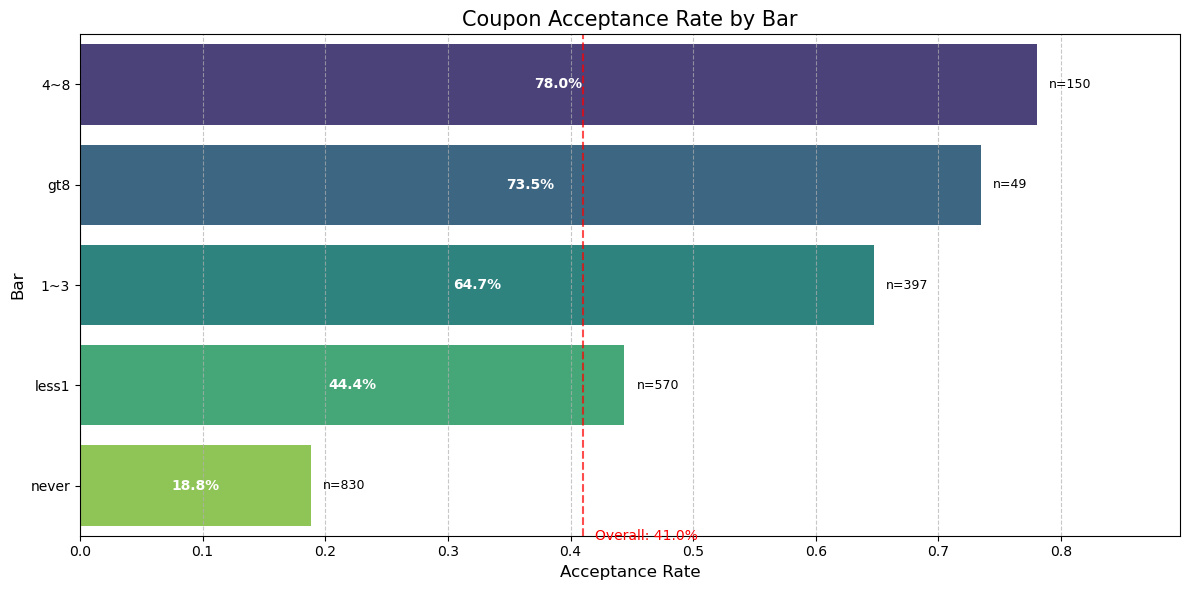

In [182]:
# Let's look at number of times people go to bars
# Calculate the acceptance rate and count by Bar
Bar_stats = bar_coupons_df.groupby('Bar').agg(
    acceptance_rate=('Coupon Accepted', 'mean'),
    count=('Coupon Accepted', 'count')
).reset_index()

# Sort by acceptance rate for better visualization
Bar_stats = Bar_stats.sort_values('acceptance_rate', ascending=False)

# Create a horizontal bar chart with count-based bar width
plt.figure(figsize=(12, 6))

# Create the horizontal bar chart
ax = sns.barplot(y='Bar', x='acceptance_rate', data=Bar_stats, 
                palette='viridis', orient='h', 
                order=Bar_stats['Bar'])

# Add percentage labels inside each bar
for i, row in enumerate(Bar_stats.itertuples()):
    # Add percentage label
    plt.text(row.acceptance_rate/2, i, f'{row.acceptance_rate:.1%}', 
             ha='center', va='center', color='white', fontweight='bold')
    
    # Add count information at the end of each bar
    plt.text(row.acceptance_rate + 0.01, i, f'n={row.count}', 
             va='center', ha='left', color='black', fontsize=9)

# Add a vertical line for the overall acceptance rate
overall_rate = bar_coupons_df['Coupon Accepted'].mean()
plt.axvline(x=overall_rate, color='red', linestyle='--', alpha=0.7)
plt.text(overall_rate + 0.01, len(Bar_stats)-0.5, f'Overall: {overall_rate:.1%}', 
         va='center', color='red')

# Improve the appearance
plt.title('Coupon Acceptance Rate by Bar', fontsize=15)
plt.xlabel('Acceptance Rate', fontsize=12)
plt.ylabel('Bar', fontsize=12)
plt.xlim(0, max(Bar_stats['acceptance_rate']) * 1.15)  # Add some space for annotations
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [183]:
## Observations
# People who go to the bar 4~8 times a month are most likely to accept a bar coupon (even more than people who go 8 or more times a month)
# Single people tend to accept the coupons more
# People with an age of 21 seem to be most accepting (This makes sense as they just got the license to drink legally

